<a href="https://colab.research.google.com/github/Adityamalik123/MLPInitialisation/blob/master/MLPInitialisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

TensorFlow is already loaded. Please restart the runtime to change versions.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, y, y_1, ax, ticks, title, colors=['b']):
  ax.plot(x, y, 'b', label='Train Loss')
  ax.plot(x, y_1, 'r', label='Test Loss')
  if len(x) == 1:
    plt.legend()
    plt.title(title)
  plt.yticks(ticks)
  fig.canvas.draw()
  #This plot is between loss and epoch

In [0]:
# N/w Parameters
n_hidden_1 = 512
n_hidden_2 = 128
n_input = 784
n_classes = 10

In [0]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32) # -> single value not array

keep_prob_input = tf.placeholder(tf.float32)

In [0]:
# As here i am using sigmoid activation unit, i'll be using xavier/glorot Normal initialisation -

# h1 => sigma =  sqrt(2 / (fan_in + fan_out + 1) -> here +1, is just to ensure the 

# here its like 786 - 512 - 128 - 10
# for h1, it becomes fan_in = 786, fanout = 512 which makes sigma as 0.039

weights_sgd = {
               'h1' : tf.Variable(tf.random_normal([n_input, n_hidden_1], stddev = 0.039, mean = 0)),
               'h2' : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev = 0.055, mean = 0)),
               'out' : tf.Variable(tf.random_normal([n_hidden_2, n_classes], stddev = 0.120, mean = 0))
}

# I'll use He Normal initialisation here
# sigma = sqrt 2/ fan_in + 1

weights_relu = {
               'h1' : tf.Variable(tf.random_normal([n_input, n_hidden_1], stddev = 0.062, mean = 0)),
               'h2' : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev = 0.125, mean = 0)),
               'out' : tf.Variable(tf.random_normal([n_hidden_2, n_classes], stddev = 0.120, mean = 0))
}


biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),  # ->Default -> mean 0 and std 1 (Standard normal)
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [0]:
training_epochs = 5
learning_rate = 0.001
batch_size = 100
display_step = 1

In [0]:
#Model 1
# I/p (784) -> Sigmoid(512) -> Sigmoid(128) -> Softmax(o/p(10))

In [0]:
#Creating model
def multilayer_perceptron(x, weights, biases):
  # print('x:', x.get_shape(), 'W[h1]', weights['h1'].get_shape(), 'b[h1]', biases['b1'].get_shape())

  layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  layer_1 = tf.nn.sigmoid(layer_1)

  # print('layer_1:', layer_1.get_shape(), 'W[h2]', weights['h2'].get_shape(), 'b[h2]', biases['b2'].get_shape())

  layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
  layer_2 = tf.nn.sigmoid(layer_2)

  # print('layer_2:', layer_2.get_shape(), 'W[out]', weights['out'].get_shape(), 'b[out]', biases['out'].get_shape())

  out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
  out_layer = tf.nn.softmax(out_layer)

  print('out_layer:', out_layer.get_shape())
  return out_layer

  

In [0]:
#Model 1 + Adam Optimiser

out_layer: (?, 10)
Epoch: 0001 train cost=1.777777722 test cost=1.769619226
Epoch: 0002 train cost=1.545951902 test cost=1.542490989
Epoch: 0003 train cost=1.521151633 test cost=1.521342389
Epoch: 0004 train cost=1.509323035 test cost=1.511243891
Epoch: 0005 train cost=1.501665726 test cost=1.504935821
out_layer: (?, 10)
[[6.5559589e-06 7.9351429e-07 9.9997962e-01 4.6465884e-06 1.9054161e-10
  9.7550412e-09 8.0703530e-06 3.8449851e-08 2.1679948e-07 1.7768290e-10]] vhj
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[2]


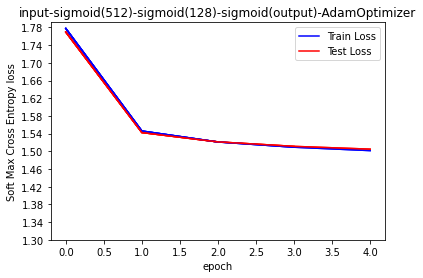

In [0]:
# Since we are using sigmoid activations in hiden layers we will be using weights that are initalized as weights_sgd
y_sgd = multilayer_perceptron(x, weights_sgd, biases)

# https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits
cost_sgd = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_sgd, labels = y_))

# https://github.com/amitmac/Question-Answering/issues/2
# there are many optimizers available: https://www.tensorflow.org/versions/r1.2/api_guides/python/train#Optimizers 
optimizer_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_sgd)
optimizer_sgdc = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_sgd)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            # here c: corresponds to the parameter cost_sgd
            # w : correspondse to the parameter weights_sgd
            # c = sess.run() return the cost after every bath during train
            # w = sess.run() return the weights that are modified after every batch through Back prop
            # w is dict w = {'h1': updated h1 weight vector after the current batch,
            #                'h2': updated h2 weight vector after the current batch, 
            #                'out': updated output weight vector after the current batch, 
            #                }
            # you check these w matrix for every iteration, and check whats happening during back prop
            #
            # note: sess.run() returns parameter values based on the input parameters
            # _, c, w = sess.run([optimizer_adam, cost_sgd,weights_sgd]) it returns three parameters
            # _, c = sess.run([optimizer_adam, cost_sgd ]) it returns two parameters
            # _ = sess.run([optimizer_adam]) it returns one paramter (for the input optimizer it return none)
            # c = sess.run([cost_sgd]) it returns one paramter (for the input cost return error after the batch)

            # feed_dict={x: batch_xs, y_: batch_ys} here x, y_ should be placeholders
            # x, y_ are the input parameters on which the models gets trained

            # here we use AdamOptimizer
            _, c, w = sess.run([optimizer_adam, cost_sgd,weights_sgd], feed_dict={x: batch_xs, y_: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost_sgd, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")

    # we are calculating the final accuracy on the test data
    feed_dict = {x: [mnist.test.images[1]]}
    data = multilayer_perceptron(x, weights_sgd, biases)
    classification = data.eval(feed_dict)
    print(classification, "vhj")
    print(mnist.test.labels[0])
    correct_prediction = tf.argmax(classification,1)
    a = sess.run(correct_prediction)
    print(a)

In [0]:
# y_sgd = multilayer_perceptron(tf.transpose(tf.expand_dims(mnist.test.images[0], 1)), weights_sgd, biases)

out_layer: (1, 10)


<tf.Tensor 'Softmax_1:0' shape=(1, 10) dtype=float32>

In [0]:
correct_prediction = tf.equal(tf.argmax(y_sgd,1), tf.argmax(mnist.test.labels[0],1))

In [0]:
tf.print(correct_prediction)

<tf.Operation 'PrintV2' type=PrintV2>

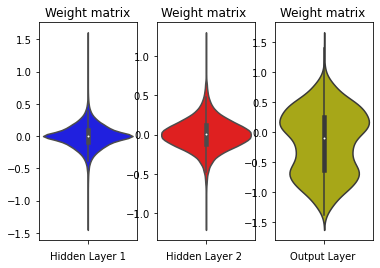

In [0]:
# Plot weight distriubtion at the end of training.

import seaborn as sns
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# similarly we can plot the violin plots for gradients.

KeyboardInterrupt: ignored

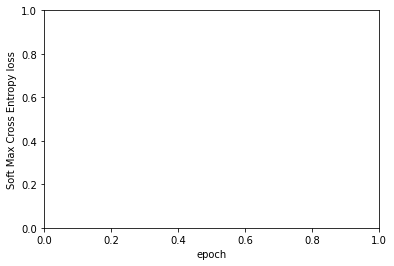

In [0]:
# Using SGD - 
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            # here we use GradientDescentOptimizer
            _, c, w = sess.run([optimizer_sgdc, cost_sgd, weights_sgd], feed_dict={x: batch_xs, y_: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost_sgd, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax, np.arange(2, 2.6, step=0.05), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-GradientDescentOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    plt_dynamic(xs, ytrs, ytes, ax, np.arange(2, 2.6, step=0.05), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-GradientDescentOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(y_sgd,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

In [0]:
# Model 2: input (784) - ReLu(512) - ReLu(128) - sigmoid(output 10)
# Now using Relu instead of sigmoid - however my output is still gonna be sigmoid since its a softmax classifier
# The only change will be in multilayer_perceptron function
#Creating model
def multilayer_perceptron_relu(x, weights, biases):
  print('x:', x.get_shape(), 'W[h1]', weights['h1'].get_shape(), 'b[h1]', biases['b1'].get_shape())

  layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  layer_1 = tf.nn.relu(layer_1)

  print('layer_1:', layer_1.get_shape(), 'W[h2]', weights['h2'].get_shape(), 'b[h2]', biases['b2'].get_shape())

  layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
  layer_2 = tf.nn.relu(layer_2)

  print('layer_2:', layer_2.get_shape(), 'W[out]', weights['out'].get_shape(), 'b[out]', biases['out'].get_shape())

  out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
  out_layer = tf.nn.sigmoid(out_layer)

  print('out_layer:', out_layer.get_shape())
  return out_layer

  